# Analisis de desarrollo estrategico sobre la cadena de gimnasios Model Fitness

El proposito del siguiente analisis es analizar los datos de clientes que se tiene en la cadena de gimnasio Model Fitness para que en base a ello, se  observar comportamiento, visitas entre otros factores, pero principalmente es explicar la perdida de clientes y buscar una extratejia para retenerlos 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import scipy.stats as ss
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram


In [2]:
gym = pd.read_csv('/datasets/gym_churn_us.csv')

In [3]:
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
def analisis_exploratorio_df(data):
    print(data.head())
    print(data.info())
    print(data.isna().sum())
    print(data.duplicated().sum())

In [5]:
analisis_exploratorio_df(gym)

   gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0  

In [6]:
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Realizando un analisis exploratorio de primera instancia se observa que existen 4mil filas y 14 columnas de las cuales no se encuntran valores nulos ni duplicados
Por la descripcion podemos analizar que exite una distribucion equilibrada de 0.5 con un ligero sesgo por parte de los hombres
Tambien nos dice que en promedio los ususarios se encuentran cerca de la ubicaion del gym, con respecto a la edad, los usuarios promedio suelen estar entre los 29 años y el pormedio de cancelacion es aparente mente bajo con solo 0.26 es dceir un cuarto de los usuarios suele cancelar 
con respecto a la desviaicon estandar dependiendo de la comlumna que analicemos tendremos distintos datos por ejemplo para genero, cancelacion y  pormo_amigo sugiere una distribucion equilabrada ya que esta cerca del 0.5, casa contrario para telefono donde la desviacion estandar es baja (0.30) lo que indica que la mayoria de los usuarios registaron su numero telefonico

In [7]:
cancelacion_vs_continuacion = gym.groupby(['Churn']).mean()
cancelacion_vs_continuacion

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Realizando la diferiencia entre los usuarios que cancalaron y no cancelarion se determina que:
La fila 0 son los usuarios que no cancelaron 
La fila 1 son los usuarios que si cancelaron 
Para este caso podemos concluir que los usuarios con mas clases, visitas y contratos mas largos son los que normalmente no cancelan, teniendo un tiempo de vida (asistencia) mas alto y la frecuencia en mes y total es mayor para estos usurios siendo casi el doble de usuario los que no cancelan

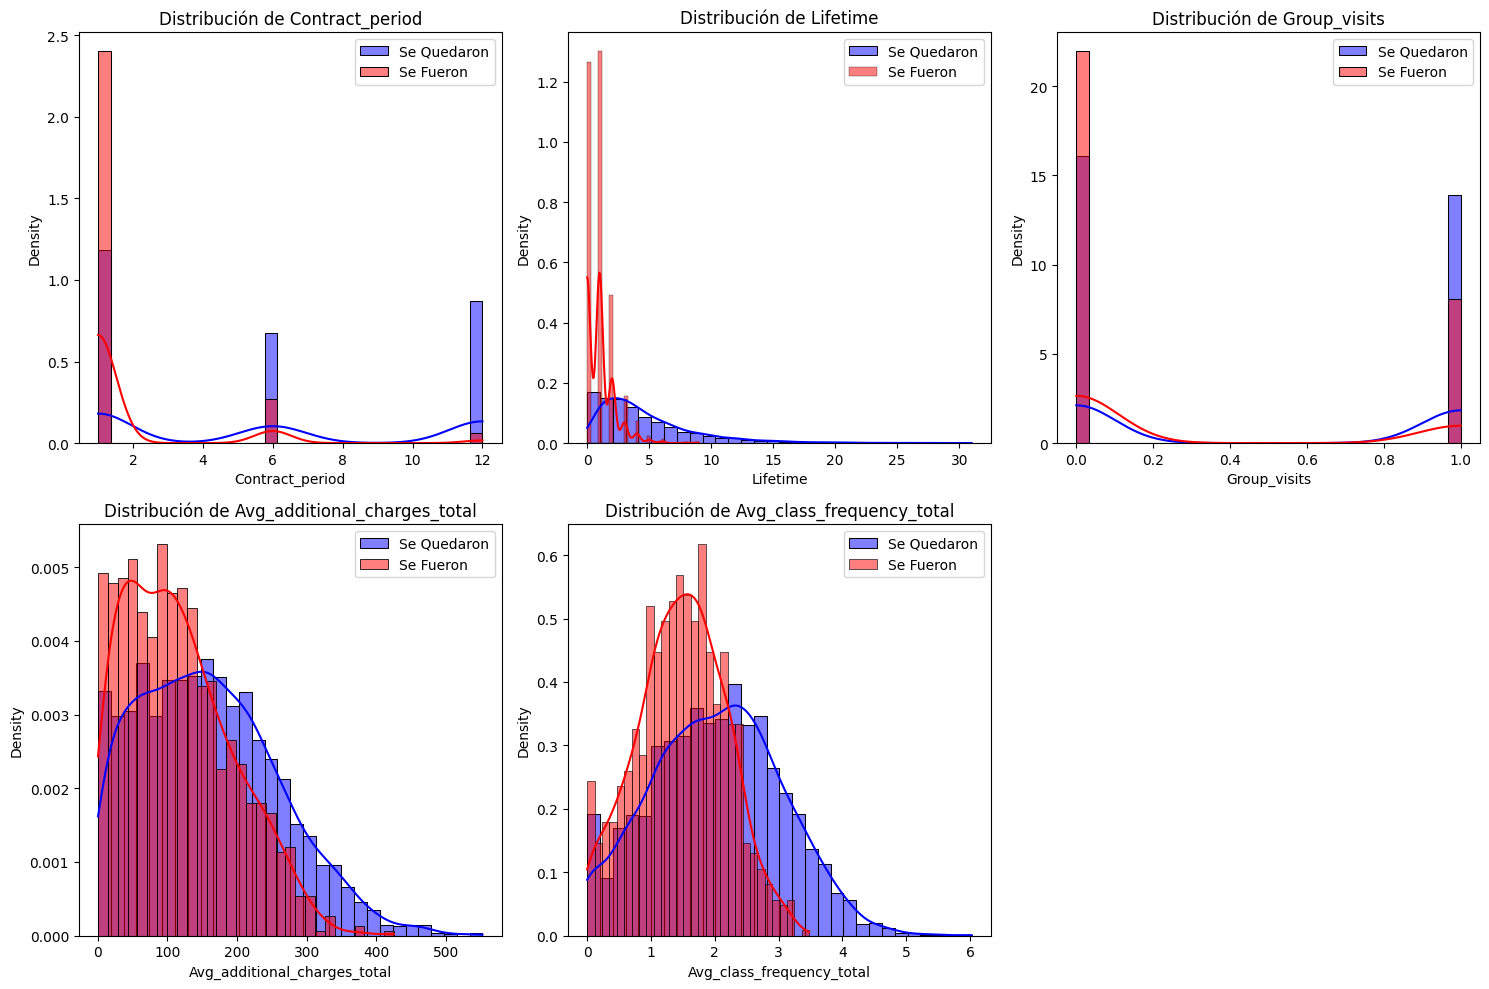

In [8]:
stayed = gym[gym['Churn'] == 0]
left = gym[gym['Churn'] == 1]
features = ['Contract_period','Lifetime', 'Group_visits', 'Avg_additional_charges_total', 'Avg_class_frequency_total']
plt.figure(figsize=(15, 10))


for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)  
    
  
    sns.histplot(stayed[feature], color='blue', kde=True, label='Se Quedaron', stat='density', bins=30)
    sns.histplot(left[feature], color='red', kde=True, label='Se Fueron', stat='density', bins=30)
    plt.title(f'Distribución de {feature}')
    plt.legend()


plt.tight_layout()
plt.show()

En los graficos podemos observar de color naranja el total de usuarios, de color asul lo ususarios que no cancaleron (se quedaron) y en rojo los que cancelaron (se fueron). En los grficos podemos observar que claramente es mayor el numero de usuarios que se quedaron. concluyendo nuevamente que los usuarios con mas clases, visitas y contratos mas largos son los que normalmente permanecen suscritos en el gym 
calaramente en la grafica lifetime, se muestra que la mayoria de los usuarios para este gimnasio no cancelaron y que los que cancelan tienden a tener un periodo de estancia corto

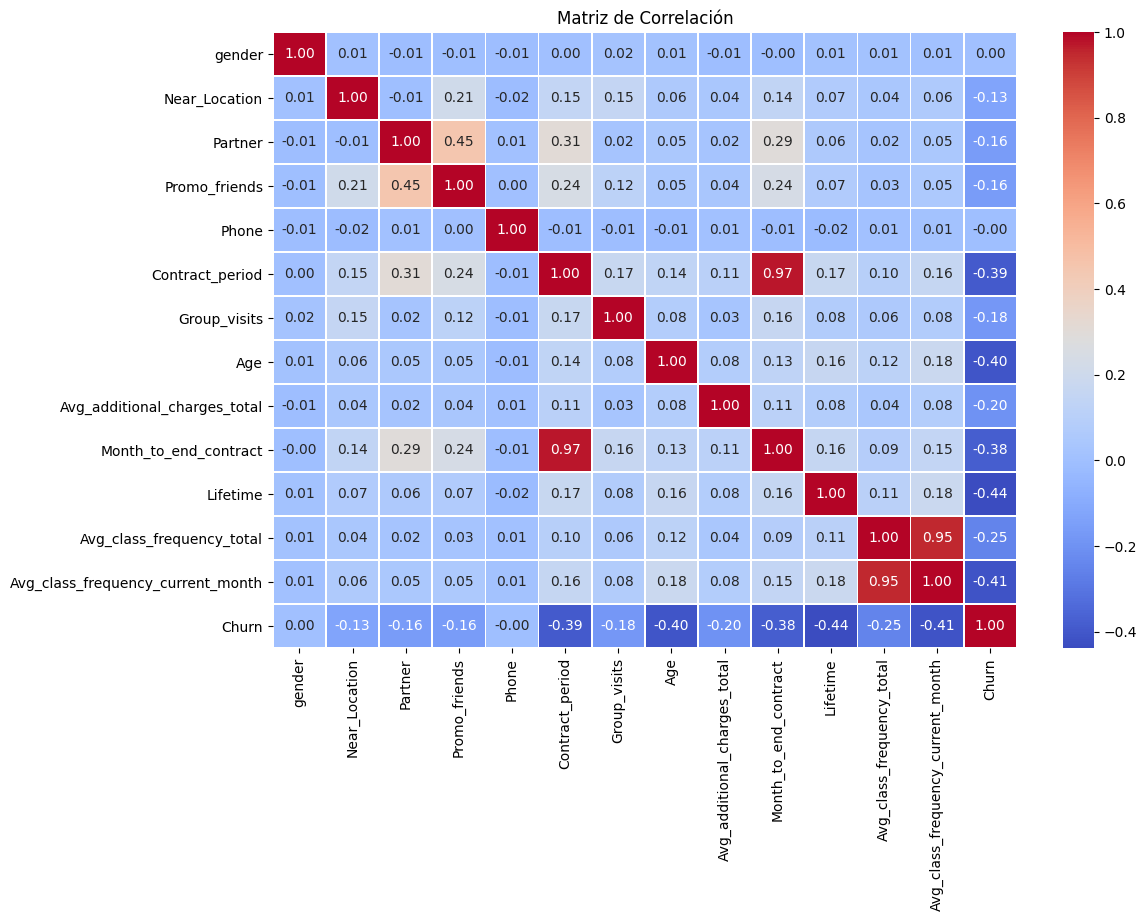

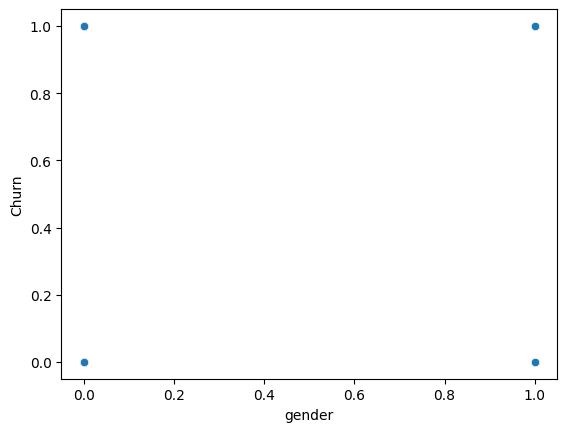

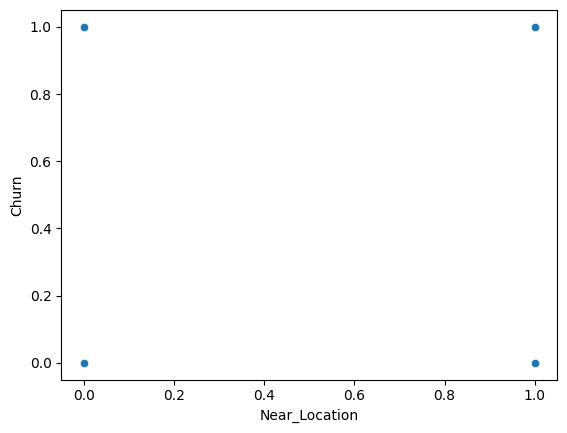

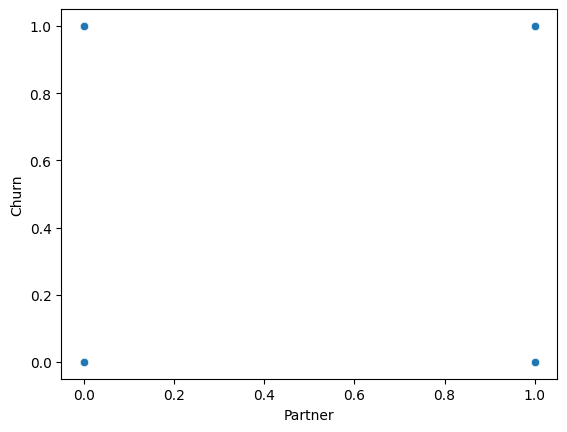

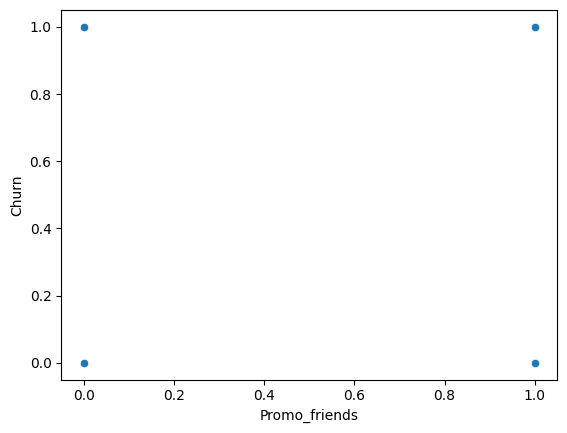

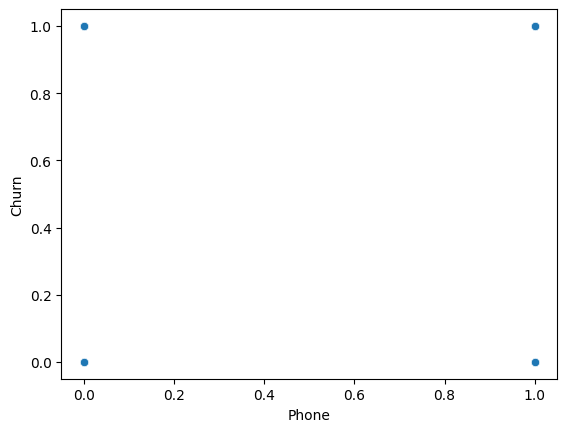

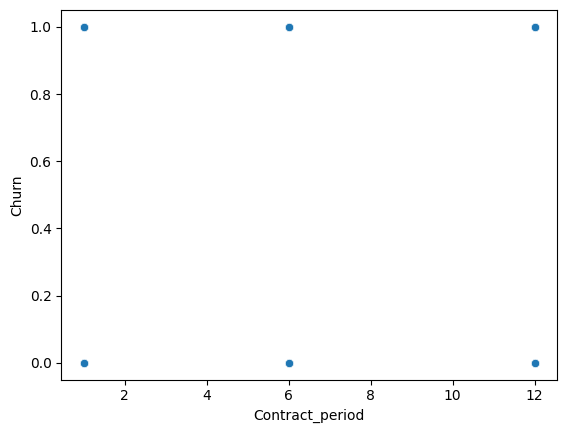

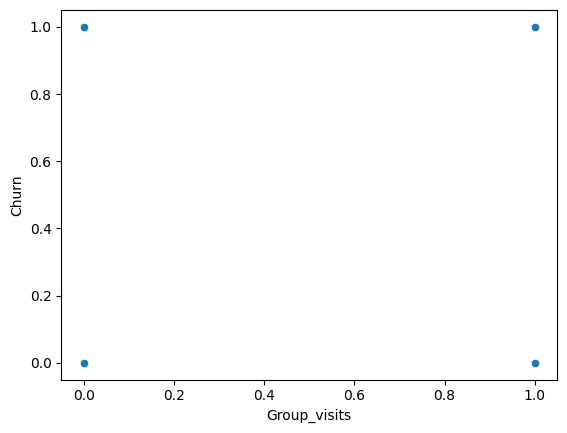

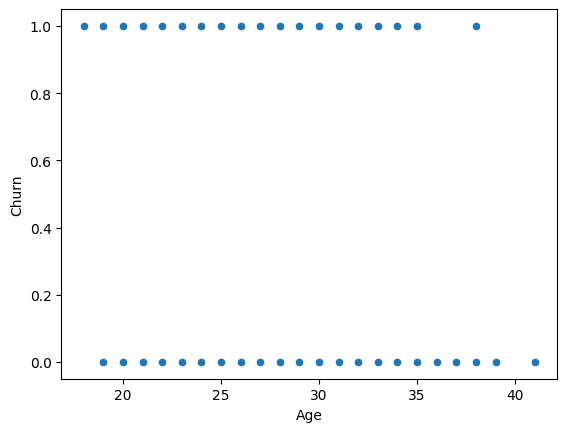

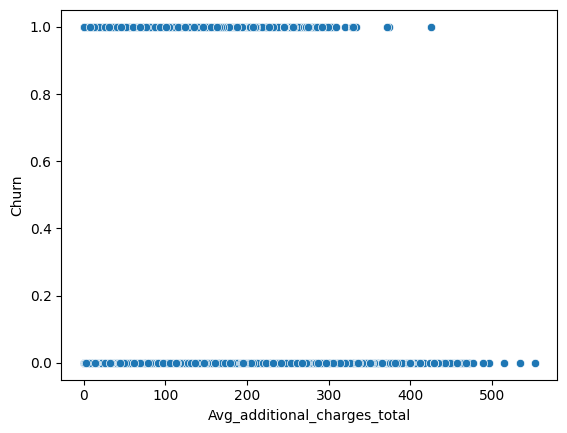

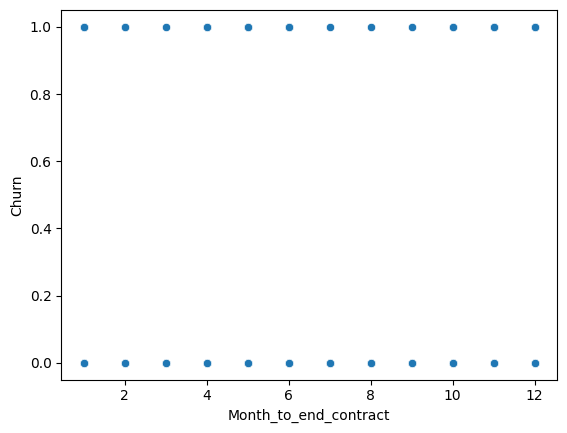

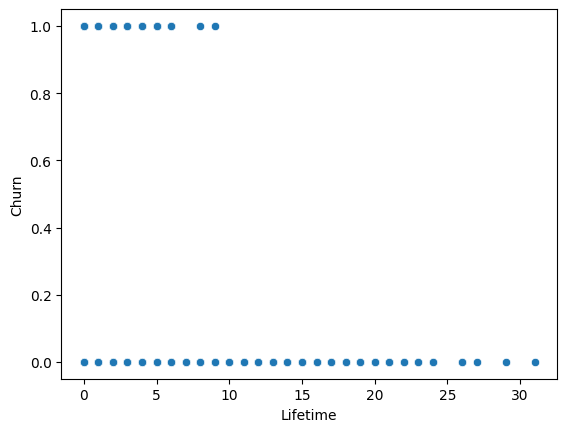

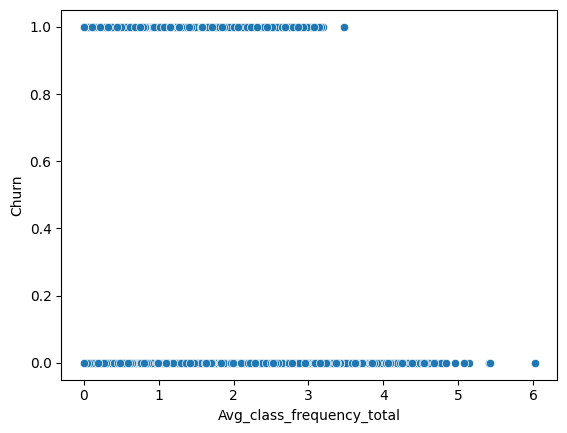

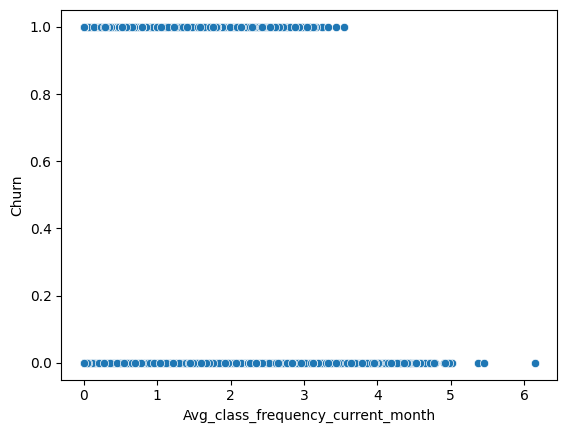

In [9]:
matriz_correlacion = gym.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


plt.title('Matriz de Correlación')
plt.show()



for col in gym.drop('Churn', axis=1,).columns:
    sns.scatterplot(x=gym[col], y=gym['Churn'])
    plt.show()

La matriz de correlación  permite observar las relaciones lineales entre las variables del dataset. Cada valor de la matriz muestra la fuerza y la dirección de la relación entre dos variables: un valor cercano a 1 indica una fuerte relación positiva, mientras que un valor cercano a -1 indica una fuerte relación negativa. Un valor cercano a 0 sugiere que no hay una relación lineal significativa.

por ejemplo en Contract_period vs Lifetime: Si ambas variables están fuertemente correlacionadas, analizaremos que los contratos más largos están relacionados con un mayor tiempo de permanencia en el gimnasio, asi esto reduce la probabilidad de cancelacióm

In [10]:
label_encoder = LabelEncoder()


gym['gender'] = label_encoder.fit_transform(gym['gender'])
gym['Near_Location'] = label_encoder.fit_transform(gym['Near_Location'])
gym['Partner'] = label_encoder.fit_transform(gym['Partner'])
gym['Promo_friends'] = label_encoder.fit_transform(gym['Promo_friends'])


X = gym.drop(columns=['Churn'])  
y = gym['Churn']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9100

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       598
           1       0.85      0.78      0.81       202

    accuracy                           0.91       800
   macro avg       0.89      0.87      0.88       800
weighted avg       0.91      0.91      0.91       800



El modelo parece ser bueno ya que la precision es muy alta para ambos casos, para el caso de los usuarios que no se fueron tiene un recall del 0.95 y f1-score de 0.94 y support de 598 el cual todos son mayores a los que si cancelaron por lo cual esta prediccion puede ser fiable ya que la cantidad de cancelacion sigue siendo baja de acuerdo a los datos que ya analizamos anteriomente

In [11]:
label_encoder = LabelEncoder()

gym['gender'] = label_encoder.fit_transform(gym['gender'])
gym['Near_Location'] = label_encoder.fit_transform(gym['Near_Location'])
gym['Partner'] = label_encoder.fit_transform(gym['Partner'])
gym['Promo_friends'] = label_encoder.fit_transform(gym['Promo_friends'])


X = gym.drop(columns=['Churn'])  
y = gym['Churn'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


logreg_model = LogisticRegression(max_iter=1000, random_state=42)


logreg_model.fit(X_train, y_train)


y_pred_logreg = logreg_model.predict(X_test)


accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"\nRegresión Logística - Accuracy: {accuracy_logreg:.4f}")
print("\nClassification Report (Regresión Logística):")
print(classification_report(y_test, y_pred_logreg))


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)


accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nBosque Aleatorio - Accuracy: {accuracy_rf:.4f}")
print("\nClassification Report (Bosque Aleatorio):")
print(classification_report(y_test, y_pred_rf))


Regresión Logística - Accuracy: 0.9163

Classification Report (Regresión Logística):
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       598
           1       0.87      0.78      0.83       202

    accuracy                           0.92       800
   macro avg       0.90      0.87      0.89       800
weighted avg       0.91      0.92      0.91       800


Bosque Aleatorio - Accuracy: 0.9100

Classification Report (Bosque Aleatorio):
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       598
           1       0.85      0.78      0.81       202

    accuracy                           0.91       800
   macro avg       0.89      0.87      0.88       800
weighted avg       0.91      0.91      0.91       800



para el entrenamiento de modelo se ha realizado una regresion logistica y un bosque leatorio en el cual. Accuracy: La precisión global del modelo, que nos dice el porcentaje de predicciones correctas es del 0.91 lo cual podemos concluir que el modelo es bueno 
para el caso de precision y recall para ambos casos son iguales 
El modelo de regresión logística es un poco más eficiente en predecir la clase 1 (clientes que se van) debido a su mayor precisión, pero los resultados no son tan diferentes de los del bosque aleatorio. por lo tanto ambos modelos son buenos

[148   7 303 ...  96 254 110]


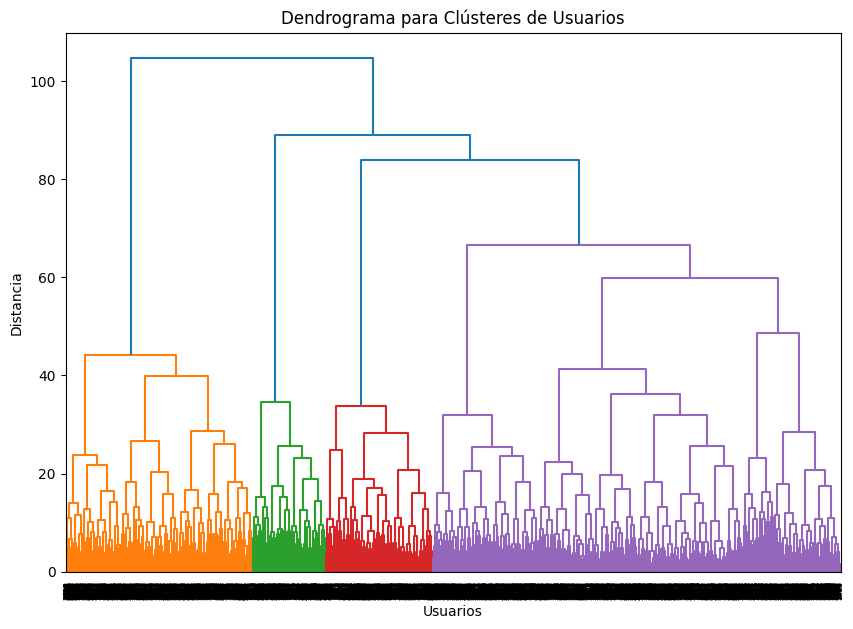

In [12]:
X = gym.drop(columns=['Churn'])

# Escalando los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Generando el linkage para la jerarquización
Z = linkage(X_scaled, method='ward')

# Establecer el umbral de distancia
max_d = 5  # Umbral de distancia
clusters = fcluster(Z, max_d, criterion='distance')

# Ver la asignación de clústeres para cada usuario
print(clusters)

# Crear y mostrar el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrograma para Clústeres de Usuarios')
plt.xlabel('Usuarios')
plt.ylabel('Distancia')
plt.show()

Cada número en el array de resultados corresponde al clúster al que pertenece un usuario en particular. Por ejemplo: El primer usuario (índice 0) pertenece al clúster 148. El segundo usuario (índice 1) pertenece al clúster 7. El tercer usuario (índice 2) pertenece al clúster 303, y así sucesivamente.

Cada número en el array de resultados corresponde al clúster al que pertenece un usuario en particular. Por ejemplo:
El primer usuario (índice 0) pertenece al clúster 148. El segundo usuario (índice 1) pertenece al clúster 7. El tercer usuario (índice 2) pertenece al clúster 303, y así sucesivamente.

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  

kmeans = KMeans(n_clusters=5, random_state=42) 
kmeans.fit(X_scaled)


clusters = kmeans.predict(X_scaled)


gym['Cluster'] = clusters


print(gym[['Cluster']].head())

   Cluster
0        4
1        2
2        3
3        2
4        0


Se ha dividido a los usuarios en 5 grupos diferentes. Los valores en la columna Cluster van desde 0 hasta 4, lo que indica que el modelo ha asignado 5 clústeres distintos.

El primer usuario (índice 0) pertenece al clúster 4.
El segundo usuario (índice 1) pertenece al clúster 2.
El tercer usuario (índice 2) pertenece al clúster 3.
El cuarto usuario (índice 3) pertenece al clúster 2.
El quinto usuario (índice 4) pertenece al clúster 0

In [14]:
cluster_counts = gym['Cluster'].value_counts()
print(cluster_counts)

3    1227
1     889
2     865
0     633
4     386
Name: Cluster, dtype: int64


en esta tabla se analiza cómo se distribuyen los usuarios en los diferentes clústeres. para  ello, es útil calcular cuántos usuarios pertenecen a cada clúster

In [15]:
cluster_means = gym.groupby('Cluster').mean()
print(cluster_means)

           gender  Near_Location   Partner  Promo_friends  Phone  \
Cluster                                                            
0        0.502370       0.949447  0.829384       0.998420    1.0   
1        0.554556       0.849269  0.263217       0.052868    1.0   
2        0.499422       0.937572  0.737572       0.478613    1.0   
3        0.485738       0.718011  0.299919       0.018745    1.0   
4        0.523316       0.862694  0.471503       0.305699    0.0   

         Contract_period  Group_visits        Age  \
Cluster                                             
0               3.097946      0.448657  29.104265   
1               2.606299      0.436445  30.008999   
2              11.854335      0.546821  29.905202   
3               1.914425      0.276284  28.083945   
4               4.777202      0.427461  29.297927   

         Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
Cluster                                                                  
0  

Para observar los valores medios  para cada uno de los clusteres, se calcula la media de cada columna agrupada por el número de clúste analizando los clusteres podemos poner por ejemplo que:

Clúster 2 tiene una alta frecuencia de visitas y un gasto mensual elevado a diferencia de los otros, lo que podría indicar que este grupo es muy activo e invierte más en el gimnasio

In [16]:
cancelation_rate = gym.groupby('Cluster')['Churn'].mean()
cancelation_rate

Cluster
0    0.246445
1    0.089989
2    0.021965
3    0.572942
4    0.266839
Name: Churn, dtype: float64

Los resultados muestran una tasa de cancelación promedio por cada clúster por ejemplo para:
El Clúster 1 es de 0.08 lo cual su tasa de cancalacion es muy baja
Para el cluster 3 es de 0.57 lo cual su tasa de cancelacion es muy alta

## conclusion

con los datos proporcionados por la cadena de gimnasios Model Fitness realizando un primer analisis no encontramos ausencia de datos, valores duplicados entre otros, lo cual nos ayudo a realizar el analisis mas eficientemente, con esto podemos predecir la probabilidad de pérdida (para el próximo mes) para cada cliente que frecuneta este gimnasio de lo cual, al realizar el análisis de clustering y calcular la tasa de cancelación para cada clúster, hemos logrado segmentar a los usuarios del gimnasio en grupos que muestran diferencias en cuanto a su lealtad y propensión a abandonar.
Al calcular la tasa de cancelación para cada clúster, hemos identificado patrones clave como:

Los clústeres con tasas de cancelación bajas, esta compuesta por usuarios leales, que muestran un bajo riesgo de abandonar el gimnasio.
Los clústeres con tasas de cancelación alta,  son más propensos a cancelar, lo que indica que estos grupos podrían estar insatisfechos, su perido de vida es mas corto y suelen tener menor aistencia.

Los clústeres con alta tasa de cancelación deben ser un foco para estrategias de retención. Esto podría incluir promociones personalizadas, programas de fidelización, o mejorar la experiencia del usuario para aumentar su satisfacción y reducir el riesgo de cancelación.